In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

## Cannon example

See Section 4 of [Cannon et al (2015)](https://journals.ametsoc.org/view/journals/clim/28/17/jcli-d-14-00754.1.xml#bib44).

In [12]:
xvals = np.arange(0, 100, 0.1)

In [106]:
obs_shape = 4.0
obs_scale = 7.5
hist_shape = 8.15
hist_scale = 3.68
future_shape = 16
future_scale = 2.63
#future_shape = 4.8
#future_scale = 5

In [107]:
future_shape * future_scale

42.08

In [108]:
obs_pdf = gamma.pdf(xvals, a=obs_shape, scale=obs_scale)
hist_pdf = gamma.pdf(xvals, a=hist_shape, scale=hist_scale)
future_pdf = gamma.pdf(xvals, a=future_shape, scale=future_scale)

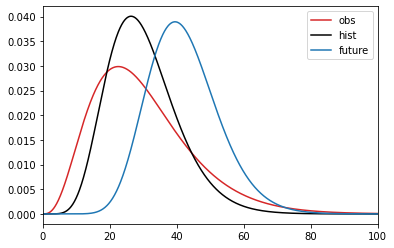

In [109]:
plt.plot(xvals, obs_pdf, color='tab:red', label='obs')
plt.plot(xvals, hist_pdf, color='black', label='hist')
plt.plot(xvals, future_pdf, color='tab:blue', label='future')
plt.legend()
plt.xlim(0, 100)
plt.show()

In [110]:
hist_mean = gamma.mean(a=hist_shape, scale=hist_scale)
hist_mean

29.992

In [111]:
future_mean = gamma.mean(a=future_shape, scale=future_scale)
future_mean

42.08

In [112]:
mean_scaling = future_mean / hist_mean
mean_scaling

1.403040810882902

In [113]:
quantiles = np.arange(0.005, 1.0, 0.01)
quantiles

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

In [114]:
len(quantiles)

100

In [115]:
obs_quantiles = gamma.ppf(quantiles, a=obs_shape, scale=obs_scale)
hist_quantiles = gamma.ppf(quantiles, a=hist_shape, scale=hist_scale)
future_quantiles = gamma.ppf(quantiles, a=future_shape, scale=future_scale)

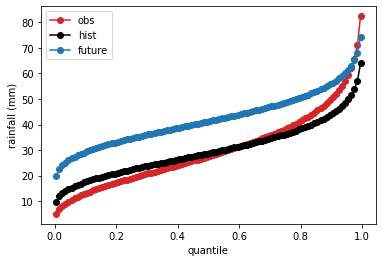

In [116]:
plt.plot(quantiles, obs_quantiles, marker='o', color='tab:red', label='obs')
plt.plot(quantiles, hist_quantiles, marker='o', color='black', label='hist')
plt.plot(quantiles, future_quantiles, marker='o', color='tab:blue', label='future')
plt.legend()
plt.ylabel('rainfall (mm)')
plt.xlabel('quantile')
plt.show()

In [117]:
gamma.std(a=obs_shape, scale=obs_scale)

15.0

In [118]:
gamma.std(a=hist_shape, scale=hist_scale)

10.505739383784466

In [119]:
gamma.std(a=future_shape, scale=future_scale)

10.52

In [120]:
adjustment_factors = future_quantiles / hist_quantiles

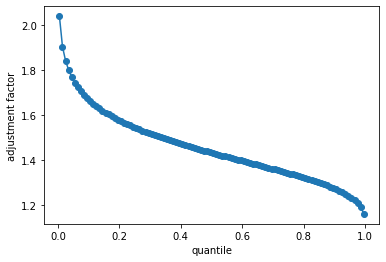

In [121]:
plt.plot(quantiles, adjustment_factors, marker='o')
plt.ylabel('adjustment factor')
plt.xlabel('quantile')
plt.show()

In [122]:
hist_adjusted = adjustment_factors * hist_quantiles
(hist_adjusted.sum() - hist_quantiles.sum()) / hist_quantiles.sum()

0.4033826330737879

In [123]:
mean_scaling

1.403040810882902

In [124]:
obs_adjusted = adjustment_factors * obs_quantiles
(obs_adjusted.sum() - obs_quantiles.sum()) / obs_quantiles.sum()

0.38321725478096996

So the multiplicative adjustment factors are larger at lower quantiles because the relative difference between the historical and future values is greater at lower rainfall amounts.

If the model underestimates the observed variance, a relatively lower proportion of the observed rainfall is at lower amounts (to recieve the bigger adjustment) so the magnitude of the qq-scaled change is smaller than the magnitude of the GCM change.

TODO: Figure out if the same applies when the shape parameter is less than one (i.e. a more realistic distribution)